## Results
In this notebook, we will analyze the results obtained by the models in the scripts 3-Models and 3-Models_2.

In [6]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

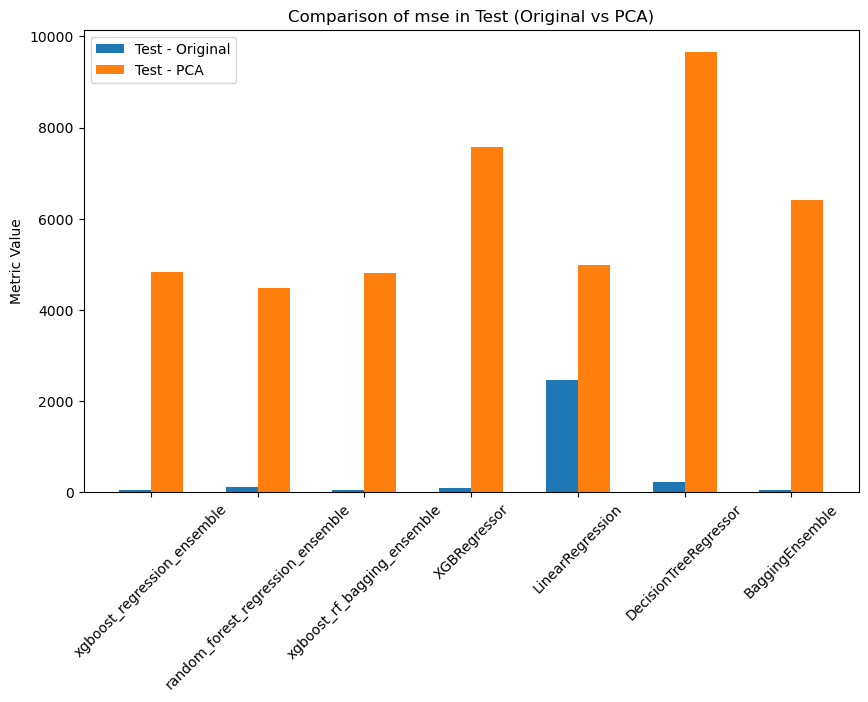

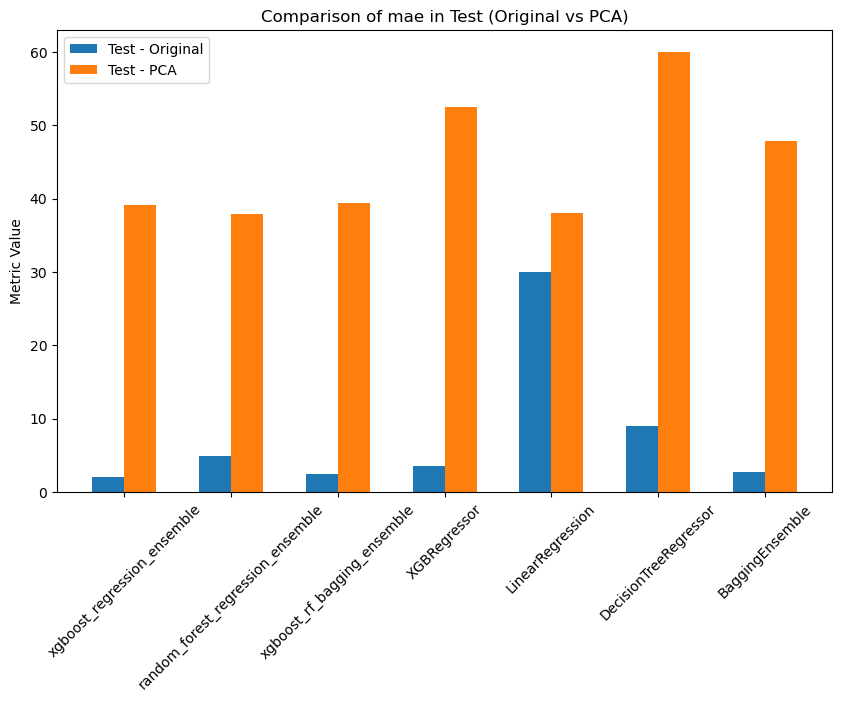

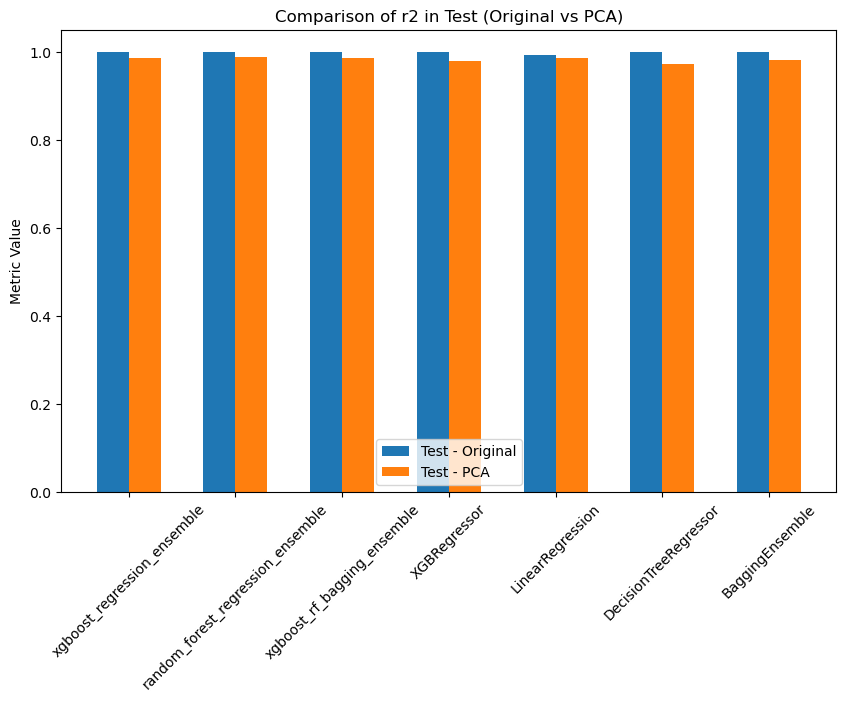

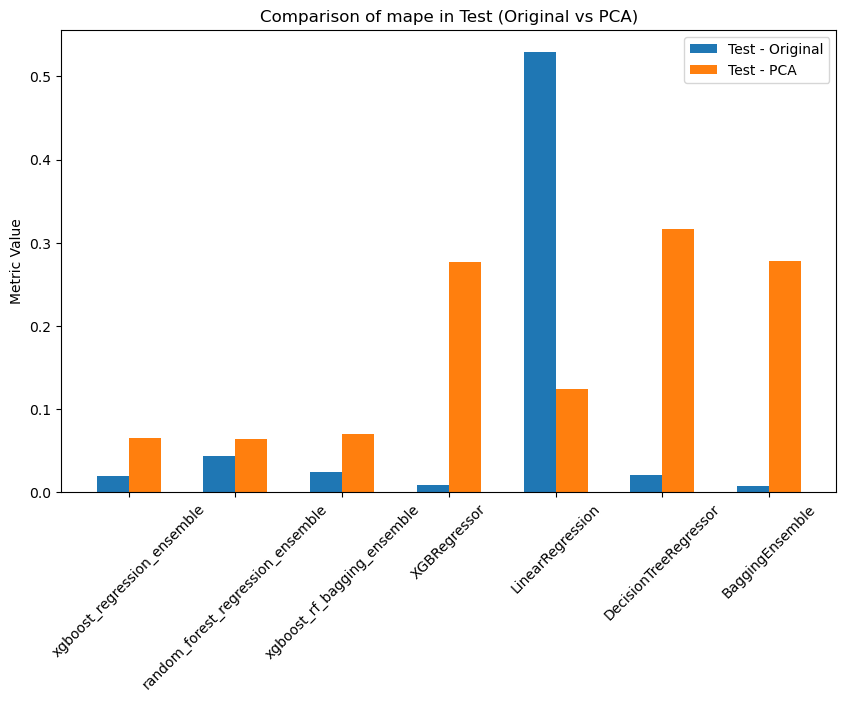

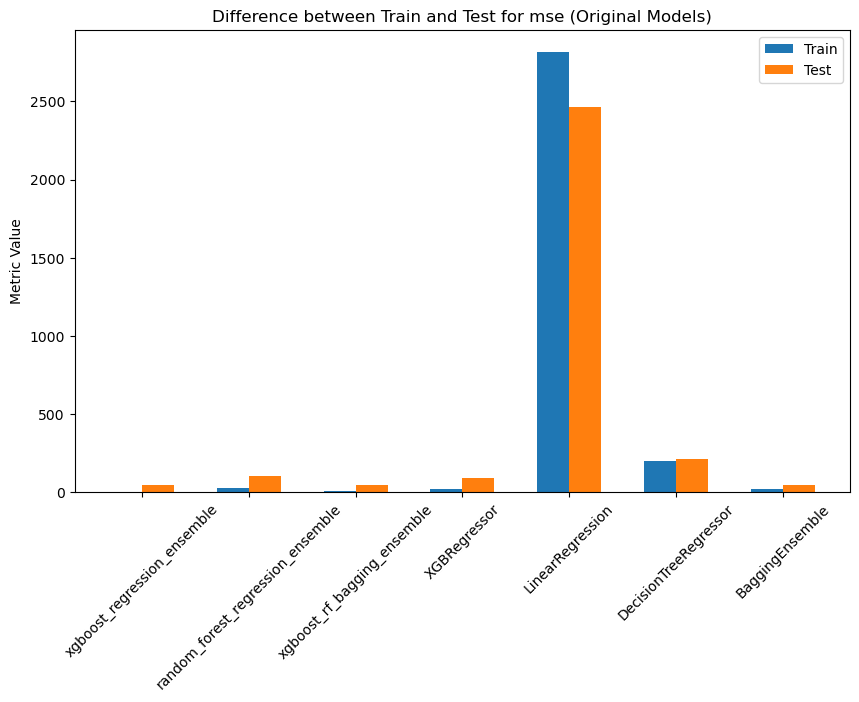

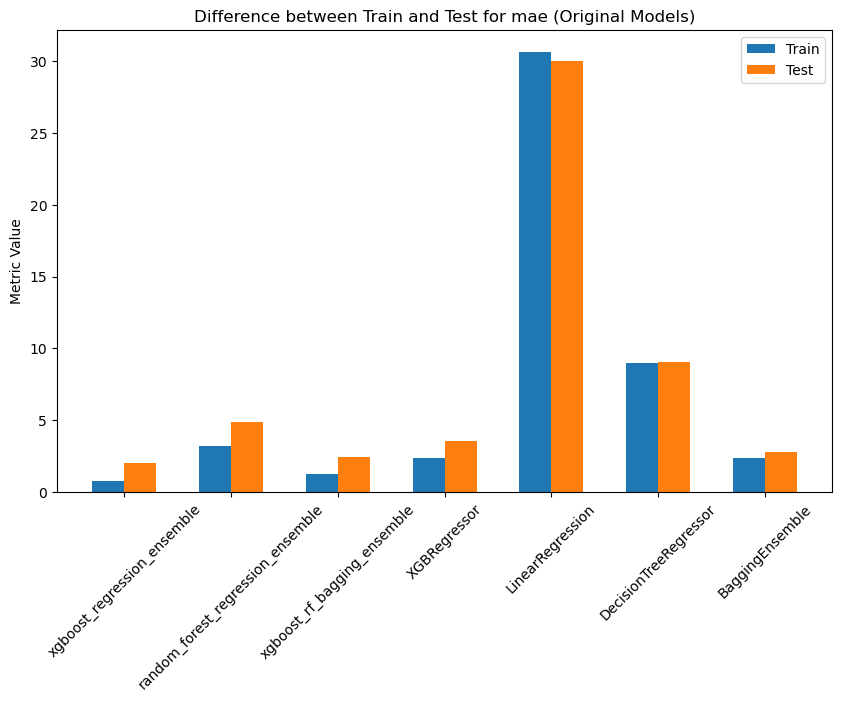

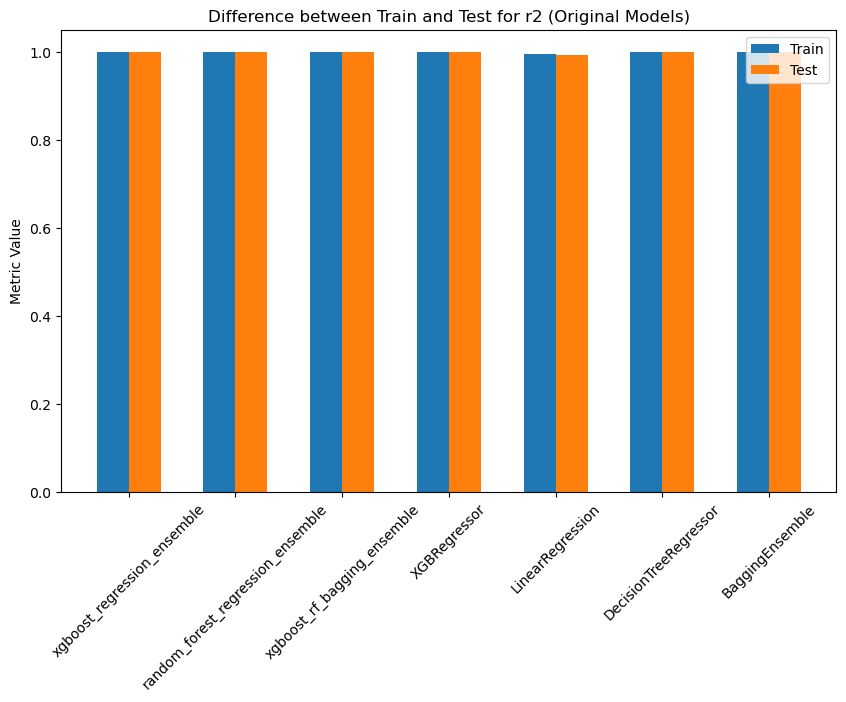

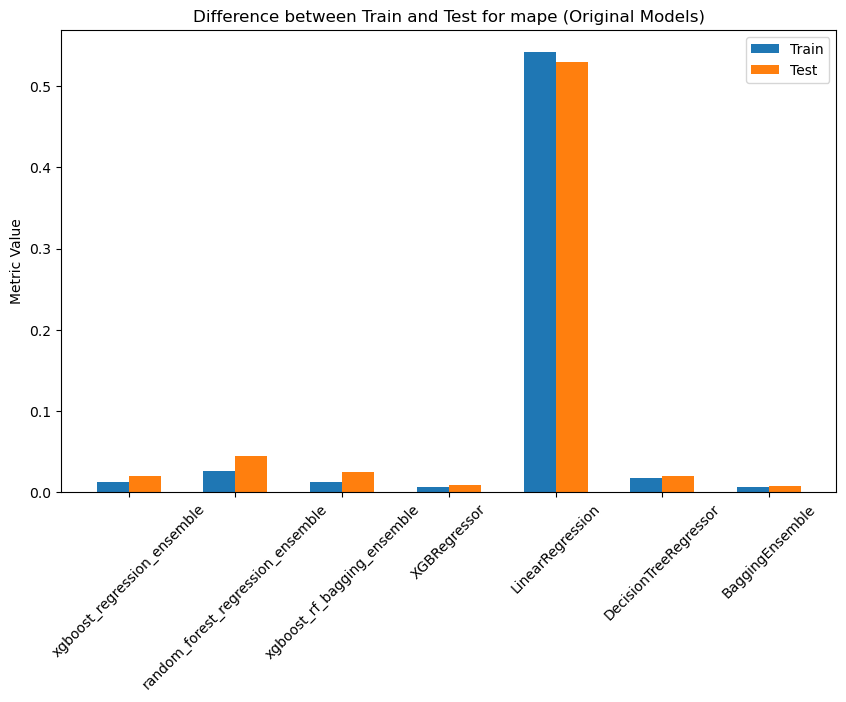

In [7]:
# Load CSV files
def load_csv(file_path):
    return pd.read_csv(file_path, index_col=0)

# Define file paths
file_paths = {
    "metrics_train": "metrics_train.csv",
    "metrics_test": "metrics_val.csv",
    "metrics_train_pca": "metrics_train_pca.csv",
    "metrics_test_pca": "metrics_val_pca.csv"
}

# Load dataframes
dataframes = {key: load_csv(path) for key, path in file_paths.items()}


# Compare test metrics of models using original data and PCA data
for metric in dataframes["metrics_test"].index:
    plt.figure(figsize=(10, 6))
    models = dataframes["metrics_test"].columns
    x = np.arange(len(models))
    width = 0.3

    plt.bar(x - width/2, dataframes["metrics_test"].loc[metric], width=width, label="Test - Original")
    plt.bar(x + width/2, dataframes["metrics_test_pca"].loc[metric], width=width, label="Test - PCA")

    plt.xticks(x, models, rotation=45)
    plt.title(f"Comparison of {metric} in Test (Original vs PCA)")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.show()

# Difference between train and test in models using original data
for metric in dataframes["metrics_train"].index:
    plt.figure(figsize=(10, 6))
    models = dataframes["metrics_train"].columns
    x = np.arange(len(models))
    width = 0.3

    plt.bar(x - width/2, dataframes["metrics_train"].loc[metric], width=width, label="Train")
    plt.bar(x + width/2, dataframes["metrics_test"].loc[metric], width=width, label="Test")

    plt.xticks(x, models, rotation=45)
    plt.title(f"Difference between Train and Test for {metric} (Original Models)")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.show()


## 1. Explanation of Metrics  
The evaluation of model performance is based on four key metrics:  

- Mean Squared Error (MSE) quantifies the average squared difference between predicted and actual values. Due to the squaring operation, it is highly sensitive to large errors.  
- Mean Absolute Percentage Error (MAPE) expresses the average absolute error as a percentage of actual values, making it scale-independent. It is less affected by outliers but may become unstable when actual values approach zero.  
- Mean Absolute Error (MAE) measures the average absolute difference between predictions and actual values, providing an interpretable error estimate in the same units as the target variable. Unlike MSE, it does not disproportionately penalize large errors.  
- The coefficient of determination (R²) indicates the proportion of variance in the dependent variable that is explained by the model. A value close to one suggests strong predictive power, while values near zero indicate poor performance.  

## 2. Original dataset vs. PCA dataset   
The original model demonstrates better predictive performance in test data across all metrics except for MAPE in linear regression, where the PCA-transformed model achieves slightly better results.  

Among the metrics, MSE exhibits the largest difference between the two models, while R² remains relatively stable. This behavior can be attributed to the fact that MSE is strongly influenced by a few large residuals, which disproportionately impact its value. In contrast, R² measures the proportion of variance explained and is less sensitive to extreme errors, leading to smaller variations between models.  

## 3. Train vs. Test  (Original dataset)  
MSE presents greater discrepancies between training and test datasets, whereas R² and MAPE remain stable in certain models. A higher MSE in the test set does not necessarily indicate overfitting but may result from the presence of isolated large residuals. The stability of R² and MAPE across train and test in some models suggests strong generalization and robustness, reinforcing their reliability in assessing model performance.  

## 4. Best Models for Kaggle Competition  
The models selected for competition are BaggingEnsemble and XGBRegressor, based on their performance in MAPE, which was chosen as the evaluation metric. These models also exhibit consistent values for MAE, R², and MAPE between training and test datasets, indicating effective generalization.  